In [1]:
import os
import datetime
import numpy as np
import pandas as pd
from os.path import dirname, abspath
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from data_processor import series_to_supervised,evaluate
from data_processor import series_to_supervised,evaluate
from sklearn.svm import SVR

In [5]:
def CF(power, NWP):
    cloud = pd.DataFrame(NWP.cloud_amount)
    cloud['cloud_diff'] = cloud.diff(1)
    cloud = cloud.fillna(0)

    cloud['sunny'] = [1 if cloud.cloud_amount[i]<5 and abs(cloud.cloud_diff[i])<1
                          else 0
                          for i in range(len(cloud))]

    cloud = cloud.loc[power.index]

    index_sunny = [x for x in cloud[cloud.sunny == 1].index if x < datetime.datetime(2019,1,1)]
    index_cloudy = [x for x in cloud[cloud.sunny == 0].index if x < datetime.datetime(2019,1,1)]

    power_sunny = power.loc[index_sunny]
    power_cloudy = power.loc[index_cloudy]

    return index_sunny,index_cloudy

In [3]:
names = locals()
# load power
dir_power = 'power_detrended/'

name_index_power = pd.Series(os.listdir(dir_power)).map(lambda x: x[:-4])

for i in name_index_power:
    filename = dir_power + str(i) + '.csv'
    names['data_%s' % i] = pd.read_csv(filename, index_col=3, parse_dates=True)
    names['power_%s' % i] = pd.DataFrame(names['data_%s' % i]['power_with_trend'])
    names['power_supervised_%s' % i] = series_to_supervised(names['power_%s' % i], 48, 16)

# load NWP
dir_NWP = 'nwp_refill/'

name_index_NWP = list(os.listdir(dir_NWP))
name_index_NWP.remove('.DS_Store')
name_index_NWP = pd.Series(name_index_NWP).map(lambda x: x[3:-4])

for i in name_index_NWP:
    filename = dir_NWP + '/CN0' + str(i) + '.csv'
    names['NWP_%s' % i] = pd.read_csv(filename, index_col=0, parse_dates=True)

In [83]:
cloud = pd.DataFrame(NWP_016.cloud_amount)

cloud = cloud.loc[power_66.index]

cloud['cloud_diff'] = cloud.diff(1)
cloud['power_diff'] = power_66.diff(1)
cloud = cloud.fillna(0)

cloud['sunny'] = [1 if cloud.cloud_amount[i]<5 and abs(cloud.cloud_diff[i])<1
                      else 0
                      for i in range(len(cloud))]


index_sunny = [x for x in cloud[cloud.sunny == 1].index if x < datetime.datetime(2019,1,1)]
index_cloudy = [x for x in cloud[cloud.sunny == 0].index if x < datetime.datetime(2019,1,1)]

power_sunny = power_66.loc[index_sunny]
power_cloudy = power_66.loc[index_cloudy]

In [84]:
len(index_sunny)

10805

In [85]:
power_sunny['date'] = power_sunny.index.date

In [86]:
sunnyday = power_sunny.groupby('date').count()>30

In [87]:
sunny_index = sunnyday[sunnyday['power_with_trend']==True].index

In [263]:
k=88

print(sunny_index[k])

2017-12-30


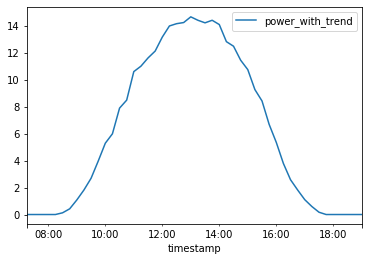

In [264]:
power_66[power_66.index.date == sunny_index[k]].plot()

In [47]:
[(2017, 1, 8)，(2017, 2, 11)，(2017, 2, 12) ,(2017, 3, 1),(2017, 3, 3),(2017, 4, 22),
 (2017, 4, 27),(2017, 4, 28),(2017, 5, 25)，(2017, 5, 26),(2017, 6, 16),(2017, 6, 30),
 (2017, 7, 1),(2017, 7, 30),(2017, 8, 16),(2017, 11, 4)，(2017,9,10), (2017, 10, 12),
 (2017, 10, 19), (2017, 10, 26),  (2017, 11, 4), (2017, 11, 24)，(2017, 12, 17)，
 (2017, 12, 20)，(2017, 12, 21)，(2017, 12, 24)，(2017, 12, 26)，(2017, 12, 27)]

(2017, 2, 11)

In [ ]:
2017, 2, 11 
and abs(cloud.power_diff[i]<0.3